# Hierarchical Clustering
In this project, I used scikit learn to conduct hierarchical clustering on the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris). I ignored the labeling and clustered first, then compared the results of different hierarchical clustering techniques with the original labels to evaluate the model. 

In [51]:
# import libraries
from sklearn import datasets
import pandas as pd
import numpy as np

# load dataset
iris = datasets.load_iris()
features = pd.DataFrame(iris.data,columns=iris.feature_names)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [52]:
# understand the distribution of features
features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
# see how many different labels in the dataset
np.unique(iris.target)

array([0, 1, 2])

In [50]:
# we can see the petal width has smaller value than other features, so we have to conduct feature scaling
from sklearn import preprocessing
features= preprocessing.normalize(features)
features[:10]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

## Build model

### 1. ward's method

In [34]:
from sklearn.cluster import AgglomerativeClustering

# Ward is the default linkage algorithm
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(features)

### 2. complete link

In [35]:
complete = AgglomerativeClustering(n_clusters=3,linkage='complete')
complete_pred = complete.fit_predict(features)

### 3. average link

In [36]:
avg = AgglomerativeClustering(n_clusters=3, linkage='average')
avg_pred =  avg.fit_predict(features)

In [37]:
# use adjusted_rand_score to evaluate cluster results
from sklearn.metrics import adjusted_rand_score

ward_score = adjusted_rand_score(iris.target, ward_pred)
complete_score = adjusted_rand_score(iris.target, complete_pred)
avg_score = adjusted_rand_score(iris.target, avg_pred)
print( "Scores: \nWard:", ward_score,"\nComplete: ", complete_score, "\nAverage: ", avg_score)

Scores: 
Ward: 0.8856970310281228 
Complete:  0.644447235392006 
Average:  0.5583714437541352


## Visualize Dengrogram with Scipy

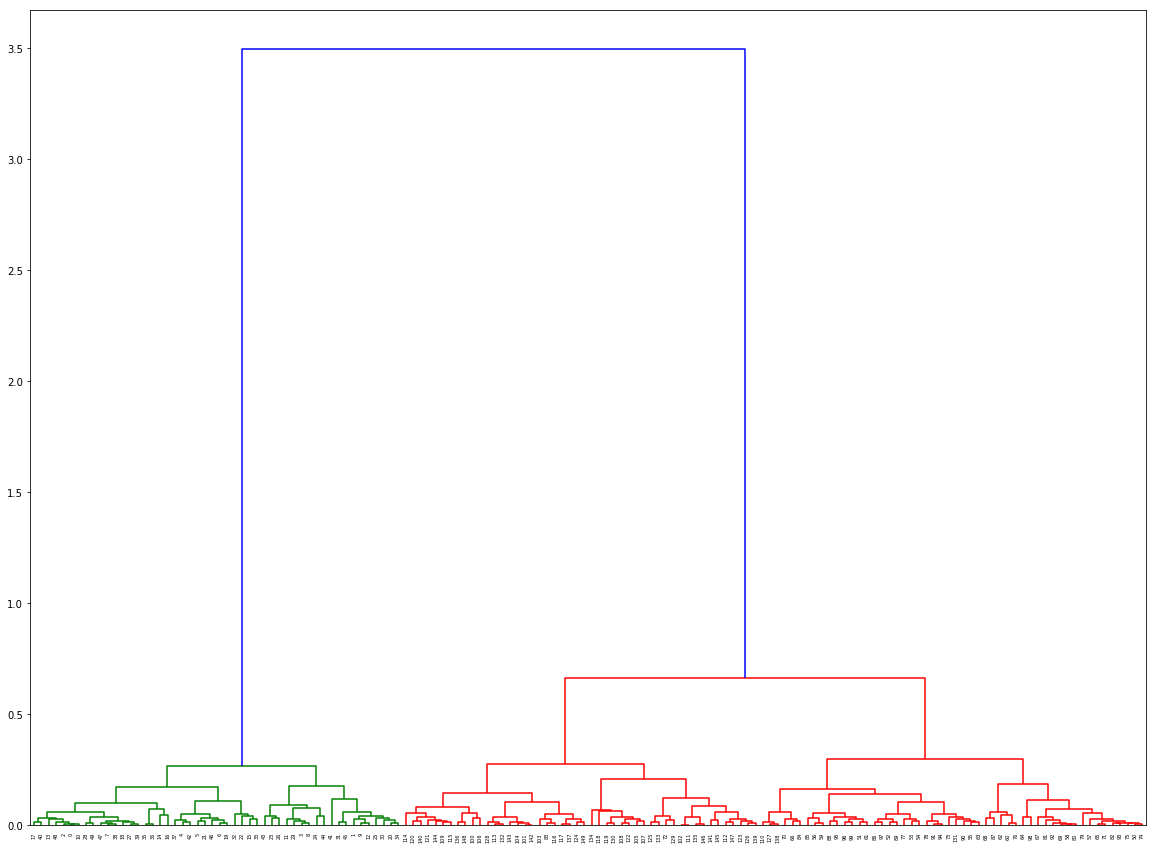

In [39]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,15))
linkage_matrix = linkage(features, 'ward')
dendrogram(linkage_matrix)
plt.show()

## Visualization using Seaborn

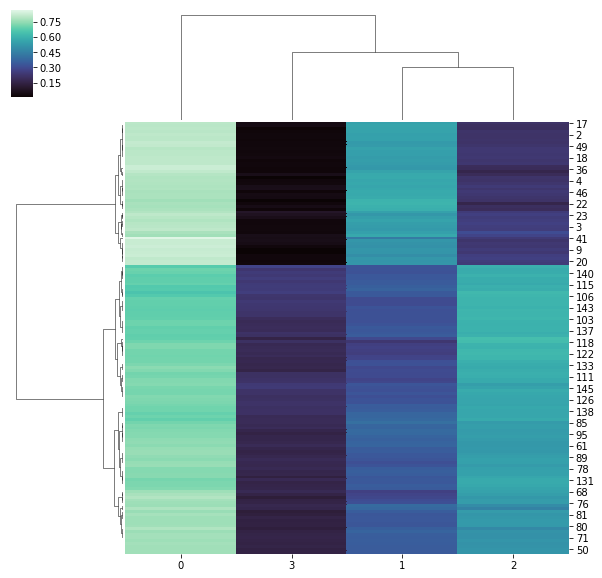

In [45]:
import seaborn as sns

sns.clustermap(features,method='ward', cmap='mako')